# Diamonds dataset

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as preproc
import matplotlib.pyplot as plt

In [193]:
df = pd.read_csv("diamonds2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   carat       1000 non-null   float64
 2   cut         994 non-null    object 
 3   color       1000 non-null   object 
 4   clarity     1000 non-null   object 
 5   depth       1000 non-null   float64
 6   table       1000 non-null   float64
 7   price       993 non-null    float64
 8   x           996 non-null    float64
 9   y           997 non-null    float64
 10  z           1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


### 2. Change the name of the very first column to idx and set this variable as the index of the dataset

In [194]:
columns = list(df.columns)
columns[0] = "idx"
df.columns = columns

print(df.columns)

df.set_index("idx")
df.index

Index(['idx', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')


RangeIndex(start=0, stop=1000, step=1)

### 3. Check how many (and which) features have non-null values

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      1000 non-null   int64  
 1   carat    1000 non-null   float64
 2   cut      994 non-null    object 
 3   color    1000 non-null   object 
 4   clarity  1000 non-null   object 
 5   depth    1000 non-null   float64
 6   table    1000 non-null   float64
 7   price    993 non-null    float64
 8   x        996 non-null    float64
 9   y        997 non-null    float64
 10  z        1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


The columns "cut", "price", "x" and "y" have null values.

### 4. Create a subset of your original dataset with only the attributes: carat, cut, depth, price

In [196]:
df_subset = df[["carat", "cut", "depth", "price"]]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1000 non-null   float64
 1   cut     994 non-null    object 
 2   depth   1000 non-null   float64
 3   price   993 non-null    float64
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


### 5. Use the function pairplot() in seaborn to plot all features in a pairwise manner.

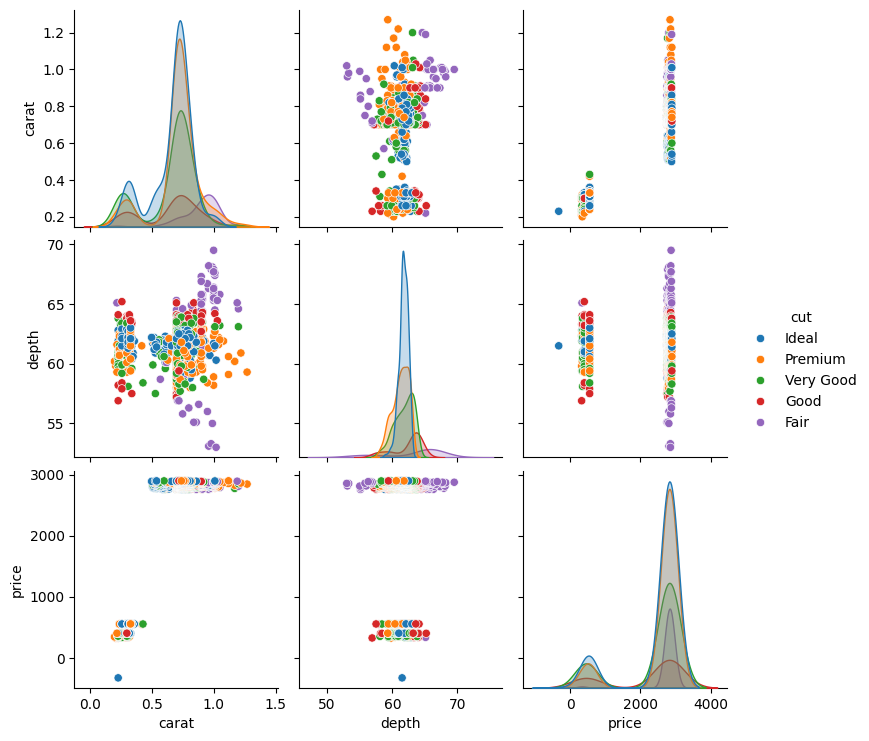

In [197]:
numeric_cols = ["carat", "depth", "price"]
sns.pairplot(df_subset, hue="cut", hue_order=["Ideal", "Premium", "Very Good", "Good", "Fair"], vars= numeric_cols)

### 6. Check if there are negative values.

In [198]:
all_numeric_cols = ["carat", "depth", "table", "price", "x", "y", "z"]

for col in all_numeric_cols:
    if not df.loc[df[col] < 0].empty:
        print(df.loc[df[col] < 0])

   idx  carat    cut color clarity  depth  table  price     x   y     z
0    1   0.23  Ideal     E     SI2   61.5   55.0 -326.0  3.95 NaN  2.43
     idx  carat      cut color clarity  depth  table   price     x     y     z
698  699   0.82  Premium     I     VS1   61.9   58.0  2853.0 -5.99  5.97  3.70
844  845   1.08  Premium     D      I1   61.9   60.0  2869.0 -6.55  6.48  4.03
     idx  carat  cut color clarity  depth  table   price     x     y     z
962  963   0.71  NaN     E     VS2   61.6   56.0  2891.0  5.74  5.76 -3.54


### 7. Set the variables that are negative to null values

In [199]:
for col in all_numeric_cols:
    if not df.loc[df[col] < 0].empty:
         df.loc[df[col] < 0, col] = float("NaN")

In [200]:
for col in all_numeric_cols:
    if not df.loc[df[col] < 0].empty:
        print(df.loc[df[col] < 0])

### 8. Set the null values to the mean of the features excluding the null values

In [201]:
for col in all_numeric_cols:
    not_NaN = pd.isna(df[col]) == False
    mean = np.mean(df.loc[not_NaN, col])
    df[col] = df[col].fillna(mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      1000 non-null   int64  
 1   carat    1000 non-null   float64
 2   cut      994 non-null    object 
 3   color    1000 non-null   object 
 4   clarity  1000 non-null   object 
 5   depth    1000 non-null   float64
 6   table    1000 non-null   float64
 7   price    1000 non-null   float64
 8   x        1000 non-null   float64
 9   y        1000 non-null   float64
 10  z        1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


### 9. Set the null values in “cut” to the most frequent value

In [202]:
most_freq_val = df["cut"].value_counts().idxmax()

df["cut"] = df["cut"].fillna(most_freq_val)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      1000 non-null   int64  
 1   carat    1000 non-null   float64
 2   cut      1000 non-null   object 
 3   color    1000 non-null   object 
 4   clarity  1000 non-null   object 
 5   depth    1000 non-null   float64
 6   table    1000 non-null   float64
 7   price    1000 non-null   float64
 8   x        1000 non-null   float64
 9   y        1000 non-null   float64
 10  z        1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


### 10. Redo the figure in step 5 and save to file fig.pdf

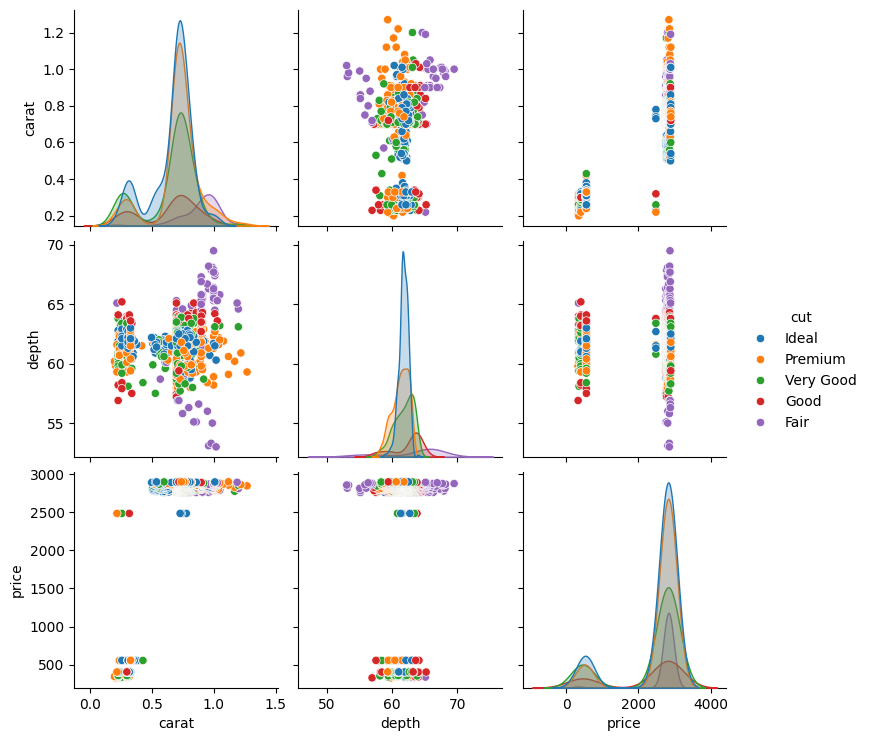

In [203]:
df_new_subset =  df[["carat", "cut", "depth", "price"]]

plot = sns.pairplot(df_new_subset, hue="cut", hue_order=["Ideal", "Premium", "Very Good", "Good", "Fair"], vars= numeric_cols)
plot.savefig("fig.pdf", )

### 11. Check if the feature clarity needs processing

In [204]:
df["clarity"] = df["clarity"].str.upper()
sum(df["clarity"].str.isupper()) == 1000

True

### 12.+ 13. Encode the variable cut as a numeric value; create a new feature called cut_num as the numeric encoding of cut + Encode the variable cut_num as a one hot encoding value; set a new feature called cut_ohe  -> 2 in 1 by using pd.get_dummies()

In [205]:
cut_ohe = pd.get_dummies(df['cut'], prefix='cut', drop_first=True)
df = pd.concat([df, cut_ohe], axis=1)
df

,idx,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,1,0.23,Ideal,E,SI2,61.5,55.0,2483.508065,3.95,5.602417,2.43,False,True,False,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326.000000,3.89,3.840000,2.31,False,False,True,False
2,3,0.23,Good,E,VS1,56.9,65.0,327.000000,4.05,4.070000,2.31,True,False,False,False
3,4,0.29,Premium,I,VS2,62.4,58.0,334.000000,4.20,4.230000,2.63,False,False,True,False
4,5,0.31,Good,J,SI2,63.3,58.0,335.000000,4.34,4.350000,2.75,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.54,Ideal,D,VVS2,61.4,52.0,2897.000000,5.30,5.340000,3.26,False,True,False,False
996,997,0.72,Ideal,E,SI1,62.5,55.0,2897.000000,5.69,5.740000,3.57,False,True,False,False
997,998,0.72,Good,f,VS1,59.4,61.0,2897.000000,5.82,5.890000,3.48,True,False,False,False
998,999,0.74,Premium,D,VS2,61.8,58.0,2897.000000,5.81,5.770000,3.58,False,False,True,False


### 14. Calculate a new feature called price_zscore as the standard Z-score of the feature price

In [206]:
mean_price = df['price'].mean()
std_price = df['price'].std()
df['price_zscore'] = round((df['price'] - mean_price) / std_price, 3)

### 15. Calculate a new feature called price_min_max as the min max scaling of the feature price
- Check its range visualizing as a histogram

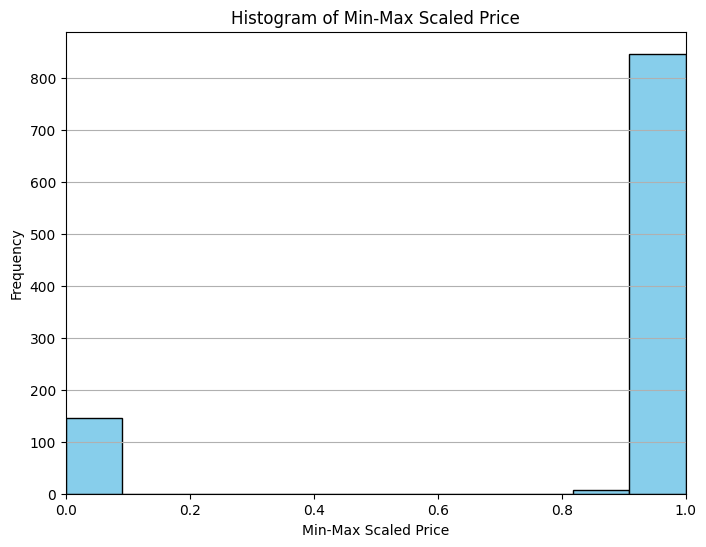

In [209]:
scaler = preproc.MinMaxScaler()

df['price_min_max'] = scaler.fit_transform(df[['price']])

plt.figure(figsize=(8, 6))
plt.hist(df['price_min_max'], bins=11, color='skyblue', edgecolor='black')
plt.title('Histogram of Min-Max Scaled Price')
plt.xlabel('Min-Max Scaled Price')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.grid(axis='y')
plt.show()